#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###**Tecnológico de Monterrey**
###**PhD. María de la Paz Rico Fdz**

## **Actividad de la Semana 6**
###**Visualización.**
###**Fecha de entrega: 01/11/2022.**

## **Alumno: Maximiliano Morones Gómez**
## **Matrícula: A01793815**

In [213]:
#Importamos las librerias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

1. Descarga los datos y carga el dataset en tu libreta.

In [214]:
#Introducimos la base de datos.
input ='https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [215]:
#Introducimos las líneas necesarias para poder leer y visualizar nuestra base de datos.
dataframe = pd.read_csv(input)
dataframe

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


Una vez que podemos visualizar y apreciar nuestra base de datos, podemos observar que tenemos una columna extra con el nombre de "ID", debido a que no cuenta con datos importantes procedemos a eliminarla o ponerla como valor nulo.

In [216]:
dataframe = pd.read_csv(input, index_col=0) #Además de leer el archivo csv donde viene la base de datos, index_col se encarga 
                                            #de borrar la columna 0.
dataframe.index.name = None # Sustituimos la columna "ID" por un valor nulo.
dataframe

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [217]:
#Los métodos son aquellos que cuentan con un paréntesis y las propiedades aquellas que no cuentan con un paréntesis.
#Para esta primera parte aplicamos para las propiedades, con la finalidad de obtener la información.
#Shape
print('Shape:', dataframe.shape) #Nos ayuda a visualizar la información mediante la propiedad "shape"

Shape: (30000, 24)


In [218]:
#Columns 
print('Columns:',dataframe.columns) #Nos ayuda a visualizar la información mediante la propiedad "columns"

Columns: Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')


In [219]:
#Dtypes
print('Dtypes:',dataframe.dtypes) #Nos ayuda a visualizar la información mediante la propiedad "dtypes"

Dtypes: X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object


Para esta segunda parte aplicamos para los métodos, con la finalidad de obtener la información.

In [220]:
dataframe.info() #Nos ayuda a visualizar la información mediante el metodo "info()"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

In [221]:
dataframe.isna() #Nos ayuda a visualizar la información mediante el metodo "isna()"

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [222]:
dataframe.head() #Nos ayuda a visualizar la información mediante el metodo "head()"

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna.

Antes de dar inicio a la limpieza, es necesario conocer algunos datos que puedan brindarnos más información, la cual facilite el proceso de limpieza, estos pueden ser el numero exacto de los registros nulos, el porcentaje que representan, etc. Para de esta manera poder tomar la mejor decisión y ver si es que se eliminan los registros nulos o se rellenan con la media de la columna.

In [223]:
print('El numero total de registros es: ' + str(dataframe.shape[0]) + '\nEl total de valores nulos es: ' + str(dataframe.isna().sum().sum())) #Imprime 
#el total de registros y el total de valores nulos.

print('Los valores nulos representan el ' + str(round(dataframe.isna().sum().sum()/dataframe.shape[0] * 100,2)) + '% del total de los valores') #Imprime 
#el porcentaje del total que representan los valores nulos.

El numero total de registros es: 30000
El total de valores nulos es: 196
Los valores nulos representan el 0.65% del total de los valores


Como siguiente parte procedemos a sacar los datos faltantes, con la finalidad de saber cuantos datos nulos se encuentran repetidos en la misma fila.

In [224]:
dataframe[dataframe.isnull().any(axis = 1)]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
19,360000,2.0,1.0,1.0,49.0,1.0,-2.0,-2.0,-2.0,-2.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,50000,1.0,1.0,2.0,25.0,1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,NaN,780.0,0.0,0.0,0.0,0.0,0.0,1.0
50,20000,1.0,1.0,2.0,24.0,0.0,0.0,0.0,0.0,NaN,...,19865.0,20480.0,20063.0,1318.0,1315.0,704.0,928.0,912.0,1069.0,0.0
65,130000,2.0,2.0,1.0,51.0,-1.0,-1.0,-2.0,-2.0,-1.0,...,0.0,2353.0,0.0,0.0,NaN,0.0,2353.0,0.0,0.0,0.0
161,30000,1.0,1.0,2.0,41.0,2.0,2.0,2.0,NaN,2.0,...,28168.0,27579.0,28321.0,3500.0,0.0,2200.0,NaN,1200.0,1250.0,0.0
174,50000,2.0,1.0,2.0,24.0,1.0,-2.0,-2.0,-2.0,-2.0,...,-2898.0,-3272.0,-3272.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0
176,130000,1.0,3.0,1.0,56.0,1.0,2.0,2.0,2.0,2.0,...,68557.0,NaN,71345.0,3000.0,3000.0,3000.0,5500.0,0.0,0.0,1.0
183,500000,2.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,...,122967.0,108834.0,70064.0,70010.0,30357.0,30000.0,20000.0,52183.0,20000.0,0.0
220,310000,2.0,1.0,2.0,NaN,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,4542.0,126.0,0.0,0.0,0.0,0.0,0.0
234,190000,1.0,2.0,2.0,34.0,2.0,0.0,0.0,0.0,NaN,...,142323.0,140120.0,150052.0,5000.0,5000.0,10000.0,0.0,12118.0,2769.0,1.0


Podemos observar que son 42 registros los que faltan, con esto podemos determinar que son un porcentaje mínimo de filas que se estarían eliminando. Pero para estar seguros lo comprobamos.

Ahora que conocemos el número de registros faltantes, procedemos a realizar la imputación y eliminación de dichos valores.

Para evitar problemas realizamos una copia de los datos, ya que se realizara una imputación y una eliminación de los valores, esto con la finalidad de observar si es que se presenta alguna diferencia.

In [225]:
dataframe_imp = dataframe.copy()
dataframe_sin_na = dataframe.copy()

In [226]:
dataframe_sin_na.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Eliminación de los valores nulos

In [227]:
dataframe_sin_na.dropna(inplace=True) #Eliminamos los registros que tengan valores nulos

In [228]:
dataframe_sin_na.shape #Nos muestra el valor final de los registros, sin valores nulos.

(29958, 24)

Como podemos observar ahora tenemos 29958 registros, de los cuales originalmente eran 30000, pero se han eliminado los 42 nulos. Con esto podemos comprobar que los registros nulos han sido eliminados de manera correcta. Como siguiente parte damos inicio a la imputación de los datos.

Imputación de los datos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f7878f150>,
      dtype=object)

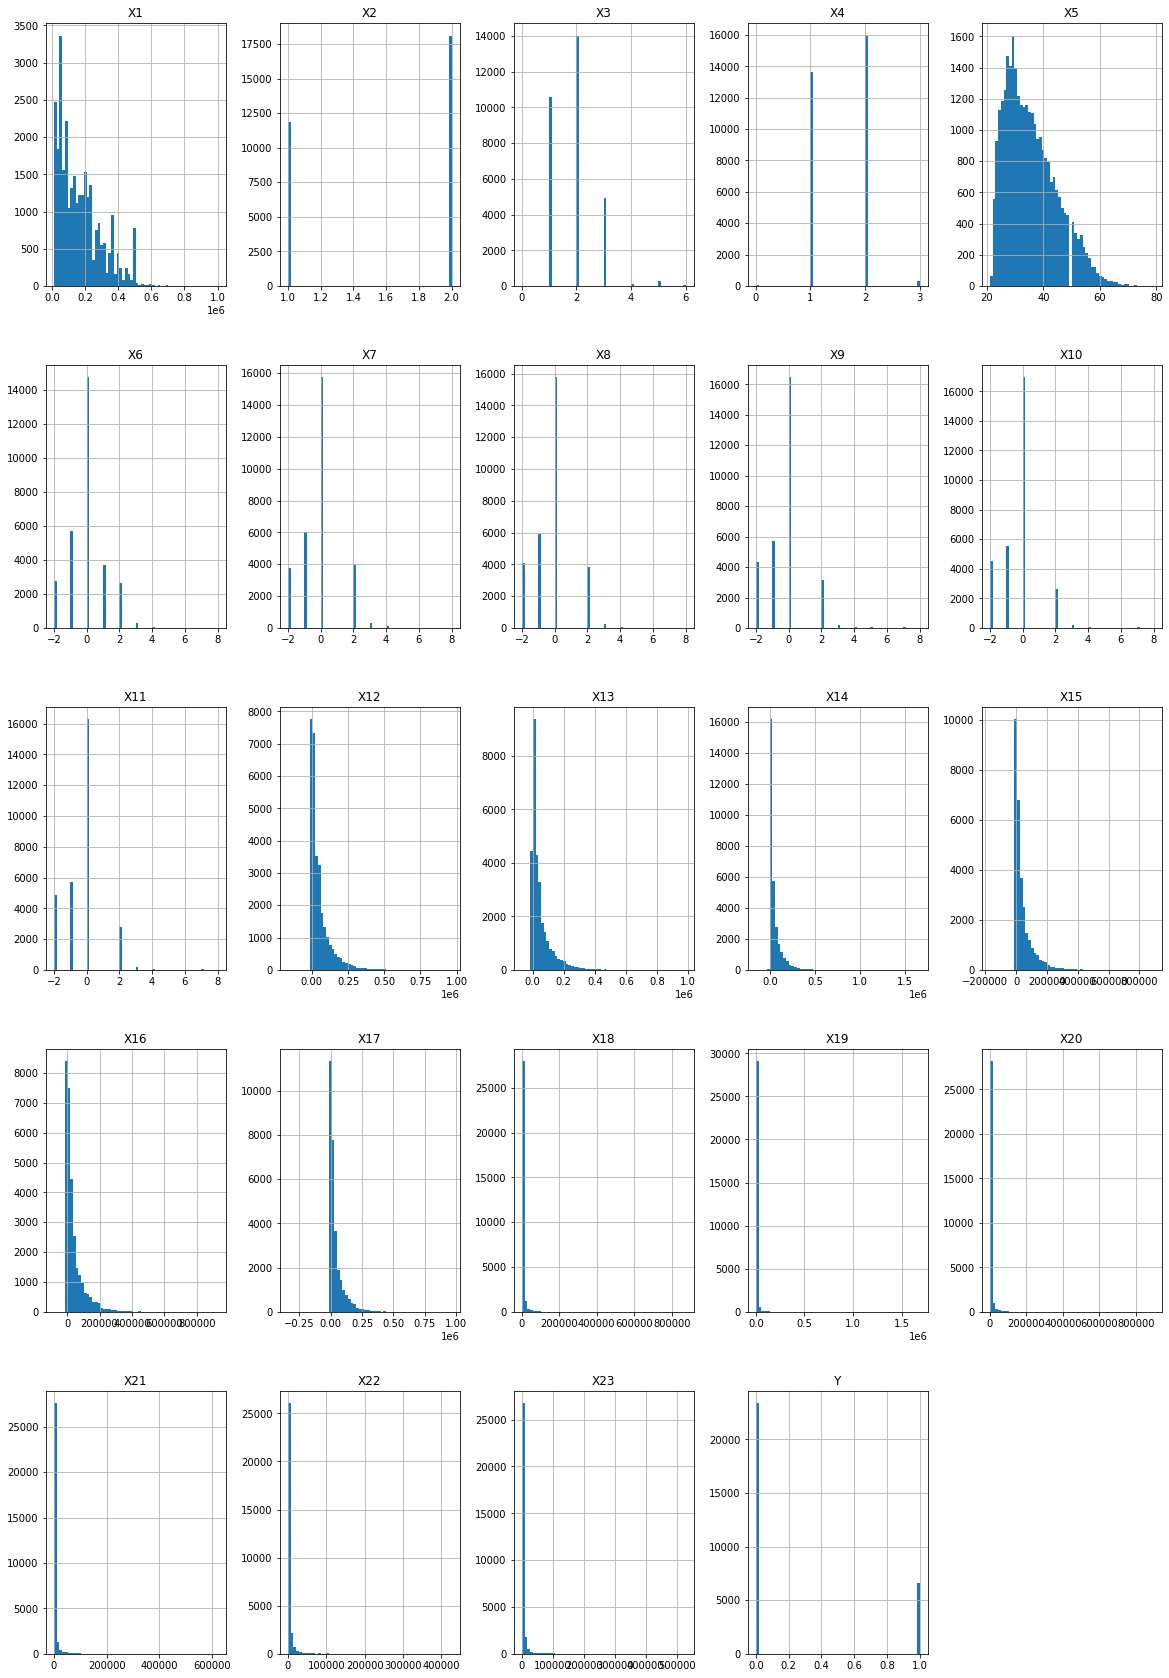

In [229]:
dataframe.hist(bins = 60, figsize=(20,30)) #Definimos propiedades como el tamaño de las figuras donde encontraremos nuestras gráficas y el numero de bins.

Como siguiente parte llevamos a cabo la separación de los valores numéricos y categóricos

In [230]:
lista_categorica = list(dataframe_imp.iloc[:,1:11]) #Definición de parametros para la lista categórica.
lista_categorica.remove('X5') #Removemos el valor "X5" de la lista categórica.
lista_categorica # Mostramos la lista categórica.

['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']

In [231]:
df_imp_cat = dataframe_imp[lista_categorica]
df_imp_cat.head()

,X2,X3,X4,X6,X7,X8,X9,X10,X11
1,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0
2,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0
3,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0


In [232]:
df_imp_num = dataframe_imp.drop(df_imp_cat.columns,axis=1)
df_imp_num.drop(axis=1,columns='Y',inplace=True)
df_imp_num.head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Como siguiente parte planteamos la lista de variables numéricas y categóricas.

In [233]:
lista_categorica = df_imp_cat.columns
lista_numerica = df_imp_num.columns

Imprimimos la lista de variables categóricas y numéricas.

In [234]:
print('Variables categóricas: ', lista_categorica)
print('--------------------------------')
print('Variables numéricas: ', lista_numerica)

Variables categóricas:  Index(['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'], dtype='object')
--------------------------------
Variables numéricas:  Index(['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23'],
      dtype='object')


In [235]:
categoricas_pipeline = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy='most_frequent'))
])

numericas_pipeline = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy='median'))
])

In [236]:
transformer = ColumnTransformer(transformers=[("cat", categoricas_pipeline, lista_categorica),("num", numericas_pipeline, lista_numerica)], remainder='passthrough');

Imprimimos la lista total, esta contiene a las listas categórica y numérica.

In [237]:
lista_total = [*lista_categorica, *lista_numerica,'Y']
lista_total

['X2',
 'X3',
 'X4',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X1',
 'X5',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'Y']

In [238]:
dataframe_imp = pd.DataFrame(transformer.fit_transform(dataframe_imp),columns=lista_total)

In [239]:
dataframe_imp.head()

,X2,X3,X4,X6,X7,X8,X9,X10,X11,X1,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,20000.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0,120000.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,90000.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,50000.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Como siguiente paso se eliminan los registros nulos que se encuentran en la variable de salida y.

In [240]:
dataframe_imp.dropna(inplace=True)

In [241]:
dataframe_imp.isnull().sum().sum()

0

4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [242]:
dataframe_imp.describe().T #Estadistica descriptiva

,count,mean,std,min,25%,50%,75%,max
X2,29997.0,1.603794,0.489116,1.0,1.0,2.0,2.0,2.0
X3,29997.0,1.853085,0.790317,0.0,1.0,2.0,2.0,6.0
X4,29997.0,1.551955,0.521963,0.0,1.0,2.0,2.0,3.0
X6,29997.0,-0.016768,1.123708,-2.0,-1.0,0.0,0.0,8.0
X7,29997.0,-0.133813,1.197088,-2.0,-1.0,0.0,0.0,8.0
X8,29997.0,-0.166517,1.195840,-2.0,-1.0,0.0,0.0,8.0
X9,29997.0,-0.220822,1.168970,-2.0,-1.0,0.0,0.0,8.0
X10,29997.0,-0.266293,1.132990,-2.0,-1.0,0.0,0.0,8.0
X11,29997.0,-0.291096,1.149861,-2.0,-1.0,0.0,0.0,8.0
X1,29997.0,167496.072274,129748.803871,10000.0,50000.0,140000.0,240000.0,1000000.0


In [243]:
dataframe_sin_na.describe().T #Estadistica descriptiva

,count,mean,std,min,25%,50%,75%,max
X1,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
X2,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
X3,29958.0,1.853094,0.790471,0.0,1.00,2.0,2.00,6.0
X4,29958.0,1.551739,0.521952,0.0,1.00,2.0,2.00,3.0
X5,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
X6,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
X7,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
X8,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
X9,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0
X10,29958.0,-0.266807,1.132307,-2.0,-1.00,0.0,0.00,8.0


Como siguiente parte procedemos a imputar valores que se encuentran fuera de rango, para este caso son los que podemos encontrar en X3.

In [244]:
dataframe_imp["X3"].unique()

array([2., 1., 3., 5., 4., 6., 0.])

In [245]:
moda_X3 = int(dataframe_imp["X3"].mode())

In [246]:
dataframe_imp["X3"].median()

2.0

In [247]:
dataframe_imp["X3"] = dataframe_imp["X3"].apply(lambda x: (moda_X3) if x > 4 else x)
dataframe_imp["X3"] = dataframe_imp["X3"].apply(lambda x: (moda_X3) if x < 1 else x)

In [248]:
dataframe_imp["X3"].unique()

array([2., 1., 3., 4.])

Como siguiente parte procedemos a imputar valores que se encuentran fuera de rango, para este caso son los que podemos encontrar en X4.

In [249]:
moda_X4 = int(dataframe_imp["X4"].mode())

In [250]:
dataframe_imp["X4"] = dataframe_imp["X4"].apply(lambda x: (moda_X4) if x < 1 else x)

In [182]:
dataframe_imp["X4"].unique()

array([1., 2., 3.])

In [251]:
dataframe_sin_na["X3"] = dataframe_sin_na["X3"].apply(lambda x: (moda_X3) if x > 4 else x)
dataframe_sin_na["X3"] = dataframe_sin_na["X3"].apply(lambda x: (moda_X3) if x < 1 else x)
dataframe_sin_na["X4"] = dataframe_sin_na["X4"].apply(lambda x: (moda_X4) if x < 1 else x)

In [252]:
dataframe_imp.describe().T

,count,mean,std,min,25%,50%,75%,max
X2,29997.0,1.603794,0.489116,1.0,1.0,2.0,2.0,2.0
X3,29997.0,1.819215,0.707404,1.0,1.0,2.0,2.0,4.0
X4,29997.0,1.555556,0.518129,1.0,1.0,2.0,2.0,3.0
X6,29997.0,-0.016768,1.123708,-2.0,-1.0,0.0,0.0,8.0
X7,29997.0,-0.133813,1.197088,-2.0,-1.0,0.0,0.0,8.0
X8,29997.0,-0.166517,1.195840,-2.0,-1.0,0.0,0.0,8.0
X9,29997.0,-0.220822,1.168970,-2.0,-1.0,0.0,0.0,8.0
X10,29997.0,-0.266293,1.132990,-2.0,-1.0,0.0,0.0,8.0
X11,29997.0,-0.291096,1.149861,-2.0,-1.0,0.0,0.0,8.0
X1,29997.0,167496.072274,129748.803871,10000.0,50000.0,140000.0,240000.0,1000000.0


In [253]:
dataframe_sin_na.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
X2,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
X3,29958.0,1.819180,0.707461,1.0,1.00,2.0,2.00,4.0
X4,29958.0,1.555344,0.518115,1.0,1.00,2.0,2.00,3.0
X5,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
X6,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
X7,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
X8,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
X9,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0
X10,29958.0,-0.266807,1.132307,-2.0,-1.00,0.0,0.00,8.0


5.Realiza el conteo de las variables categóricas

In [254]:
lista_categorica = list(dataframe_imp.iloc[:,1:11]) #Definimos los parámetros de la lista categórica.
lista_categorica.remove('X5') #Removemos la variable de la lista categórica.

In [255]:
lista_categorica #Comando que nos muestra las variables categóricas definidas anteriormente.

['X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X1']

6.Escala los datos, si consideras necesario

In [256]:
dataframe_imp_pca = dataframe_imp.copy()
dataframe_sna_pca = dataframe_sin_na.copy()

In [257]:
dataframe_imp_pca.drop(columns = lista_categorica, inplace=True)
dataframe_imp_pca.drop(columns ='Y',inplace=True)

In [258]:
dataframe_sna_pca.drop(columns = lista_categorica,inplace=True)
dataframe_sna_pca.drop(columns ='Y',inplace=True)

In [259]:
scaler = StandardScaler() #Definimos variable scaler que almacena el método StandardScaler().
scaled_imp = scaler.fit_transform(dataframe_imp_pca) #scaled va a almacenar los valores de la estandarización de los valores.
scaled_sna = scaler.fit_transform(dataframe_sna_pca)

In [260]:
scaled_df_imp = pd.DataFrame(scaled_imp, columns=dataframe_imp_pca.columns)
scaled_df_sna = pd.DataFrame(scaled_sna, columns=dataframe_sna_pca.columns)

In [261]:
scaled_df_imp.head()

,X2,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,0.810059,-1.245888,-0.642561,-0.647432,-0.668024,-0.672527,-0.663098,-0.652783,-0.341876,-0.227099,-0.296765,-0.308069,-0.314126,-0.293397
1,0.810059,-1.028903,-0.659279,-0.666779,-0.639285,-0.621667,-0.606269,-0.598026,-0.341876,-0.213601,-0.239968,-0.244239,-0.314126,-0.180899
2,0.810059,-0.160961,-0.298625,-0.493936,-0.482443,-0.449766,-0.417229,-0.391694,-0.250224,-0.191901,-0.239968,-0.244239,-0.248675,-0.012151
3,0.810059,0.164517,-0.057561,-0.013342,0.032799,-0.232414,-0.186772,-0.156648,-0.221122,-0.169377,-0.228609,-0.237856,-0.244159,-0.237148
4,-1.234479,2.334370,-0.578679,-0.611352,-0.161231,-0.347035,-0.348179,-0.331547,-0.221122,1.334949,0.271200,0.266405,-0.269030,-0.255204


In [262]:
scaled_df_sna.head()

,X2,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,0.809689,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,0.809689,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,0.809689,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,0.809689,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-1.235043,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


7. Reduce las dimensiones con PCA, si consideras necesario.

In [263]:
pcs_imp_a = PCA() #Creamos variable pcs que almacena el método PCA().
pcs_sna_b = PCA()

pcs_imp = pcs_imp_a.fit_transform(scaled_df_imp) ##variable pcs_t almacena los valores aplicados de la transformación de pcs
pcs_sna = pcs_sna_b.fit_transform(scaled_df_sna)

In [264]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df_imp.columns))] 
pcs_labels

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14']

In [265]:
pcsSummary_df_imp = pd.DataFrame({'Desviación estándar': np.sqrt(pcs_imp_a.explained_variance_),
                             'Proporción de varianza': pcs_imp_a.explained_variance_ratio_,
                             'Proporción Acumulada': np.cumsum(pcs_imp_a.explained_variance_ratio_)
                             })

pcsSummary_df_imp = pcsSummary_df_imp.T
pcsSummary_df_imp.columns = pcs_labels
pcsSummary_df_imp.round(4)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviación estándar,2.4046,1.2769,1.0427,0.9539,0.9524,0.9398,0.9328,0.8821,0.8524,0.5144,0.2665,0.2031,0.1592,0.1525
Proporción de varianza,0.4130,0.1165,0.0777,0.0650,0.0648,0.0631,0.0622,0.0556,0.0519,0.0189,0.0051,0.0029,0.0018,0.0017
Proporción Acumulada,0.4130,0.5295,0.6071,0.6721,0.7369,0.8000,0.8621,0.9177,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


In [266]:
pcsSummary_df_sna = pd.DataFrame({'Desviación estándar': np.sqrt(pcs_sna_b.explained_variance_),
                             'Proporción de varianza': pcs_sna_b.explained_variance_ratio_,
                             'Proporción Acumulada': np.cumsum(pcs_sna_b.explained_variance_ratio_)
                             })

pcsSummary_df_sna = pcsSummary_df_sna.T
pcsSummary_df_sna.columns = pcs_labels
pcsSummary_df_sna.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviación estándar,2.4046,1.2768,1.0429,0.9539,0.9523,0.9398,0.9329,0.8821,0.8524,0.5144,0.2665,0.2031,0.1592,0.1525
Proporción de varianza,0.4130,0.1164,0.0777,0.0650,0.0648,0.0631,0.0622,0.0556,0.0519,0.0189,0.0051,0.0029,0.0018,0.0017
Proporción Acumulada,0.4130,0.5294,0.6071,0.6721,0.7369,0.8000,0.8621,0.9177,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


In [267]:
total_var = scaled_df_imp.var().sum()
pd.DataFrame({
"Porcentaje Varianza": (scaled_df_imp.var()/ total_var) * 100,
"Porcentaje Varianza Acumulado": (scaled_df_imp.var().cumsum() / total_var) *100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
X2,7.142857,7.142857
X5,7.142857,14.285714
X12,7.142857,21.428571
X13,7.142857,28.571429
X14,7.142857,35.714286
X15,7.142857,42.857143
X16,7.142857,50.000000
X17,7.142857,57.142857
X18,7.142857,64.285714
X19,7.142857,71.428571


In [268]:
pcsSummary_df_imp = pd.DataFrame({
'% varianza explicada': np.round(pcs_imp_a.explained_variance_ratio_,4) * 100,
'% varianza acumulada': np.cumsum(pcs_imp_a.explained_variance_ratio_) * 100
},
index = pcs_labels)
pcsSummary_df_imp

,% varianza explicada,% varianza acumulada
PC1,41.30,41.300196
PC2,11.65,52.946346
PC3,7.77,60.711818
PC4,6.50,67.211143
PC5,6.48,73.690320
PC6,6.31,79.998479
PC7,6.22,86.214049
PC8,5.56,91.771466
PC9,5.19,96.960718
PC10,1.89,98.850649


In [269]:
pcsSummary_df_sna = pd.DataFrame({
'% varianza explicada': np.round(pcs_sna_b.explained_variance_ratio_,4) * 100,
'% varianza acumulada': np.cumsum(pcs_sna_b.explained_variance_ratio_) * 100
},
index = pcs_labels)
pcsSummary_df_sna

,% varianza explicada,% varianza acumulada
PC1,41.30,41.298083
PC2,11.64,52.942220
PC3,7.77,60.710996
PC4,6.50,67.210673
PC5,6.48,73.688101
PC6,6.31,79.996988
PC7,6.22,86.213095
PC8,5.56,91.771216
PC9,5.19,96.960823
PC10,1.89,98.850912


In [270]:
pcsComponents_df_imp = pd.DataFrame(pcs_imp_a.components_.round(4),#datos pcs.components nos da los pesos de cada uno de los componentes
                                columns=pcs_labels,#columnas Son 14 columnas, las cuales hacen referencia a cada uno de los componentes: PC1, PC2...PC10
                                index=scaled_df_imp.columns #índice (ID) Las filas son 10 también, las cuales hacen referencia a las variables originales
                                )
pcsComponents_df_imp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X2,-0.0128,0.0293,0.3789,0.3903,0.3952,0.3983,0.3950,0.3870,0.1335,0.1149,0.1257,0.1143,0.1107,0.1019
X5,0.0152,0.0255,-0.1827,-0.1592,-0.1041,-0.0984,-0.0837,-0.0729,0.4236,0.4523,0.4247,0.3721,0.3107,0.3288
X12,-0.7141,0.6987,0.0044,-0.0021,-0.0117,-0.0136,-0.0209,-0.0219,-0.0112,-0.0141,0.0119,-0.0128,-0.0065,0.0014
X13,-0.4138,-0.4226,-0.0418,0.0170,0.0464,0.0654,0.0349,-0.0840,0.2967,0.2469,0.1968,-0.0862,-0.6207,-0.2305
X14,0.5625,0.5751,-0.0370,0.0068,0.0335,0.0462,0.0244,-0.0559,0.2138,0.1723,0.1252,-0.0888,-0.4403,-0.2272
X15,-0.0165,-0.0091,-0.0416,-0.0793,-0.1186,-0.0231,0.1181,0.1495,-0.2033,-0.1636,0.2668,0.6060,0.0742,-0.6548
X16,-0.0326,-0.0240,-0.0562,-0.0354,0.0946,0.0246,-0.0849,0.0675,0.0639,0.4329,-0.0496,-0.4833,0.4944,-0.5483
X17,0.0179,-0.0118,0.0119,-0.0309,-0.1243,0.1259,-0.0044,0.0155,-0.2113,-0.2984,0.7947,-0.4365,0.0556,0.0899
X18,0.0088,0.0103,0.0085,-0.1364,0.0943,0.0380,0.0485,-0.0033,-0.7479,0.5851,0.0584,0.0721,-0.1792,0.1614
X19,0.0197,-0.0115,0.5672,0.3855,0.1214,-0.2058,-0.4205,-0.4906,-0.0582,0.0497,0.1421,0.1209,0.0559,-0.1038


In [271]:
pcsComponents_df_imp.abs().idxmax() #Nos interesa buscar los máximos por filas, no por columnas. Por eso usamos idxmax
#Si quisieramos especidicar en una sola columna, llamaríamos el nombre del componente (PCA1)

PC1     X12
PC2     X12
PC3     X19
PC4     X23
PC5     X23
PC6     X20
PC7     X22
PC8     X20
PC9     X18
PC10    X18
PC11    X17
PC12    X15
PC13    X13
PC14    X15
dtype: object

In [272]:
pcsComponents_df_imp.PC5.abs().nlargest(5)

X23    0.5290
X21    0.4941
X20    0.4861
X2     0.3952
X17    0.1243
Name: PC5, dtype: float64

Correlación que existe entre las variables

In [273]:
corrmat = dataframe_imp.corr().abs()
k = 10
cols = corrmat.nlargest(k, 'Y')['Y'].index
cols

Index(['Y', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X1', 'X18', 'X19'], dtype='object')

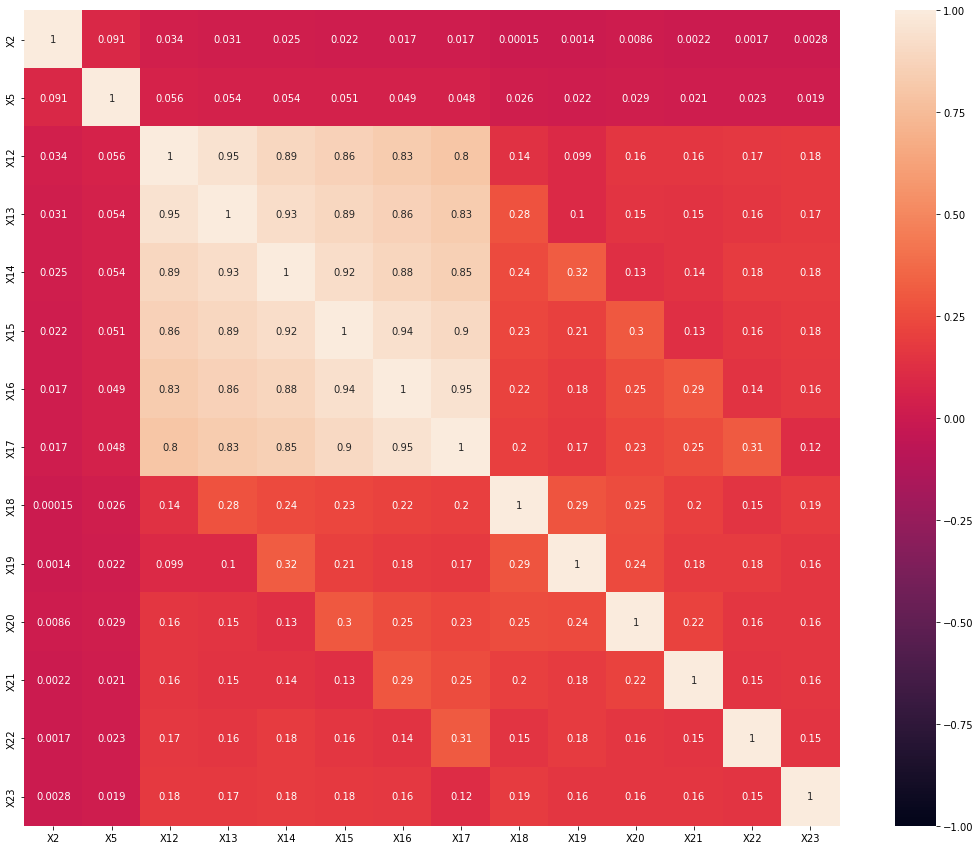

In [278]:
corrmat = scaled_df_imp.corr().abs()

f, ax = plt.subplots(figsize = (20,15)) #Definir el área de trabajo.
sns.heatmap(corrmat, vmax = 1, vmin = -1, square = True, annot = True)

8.Elabora los histogramas de los atributos para visualizar su distribución

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f7618ca50>,
      dtype=object)

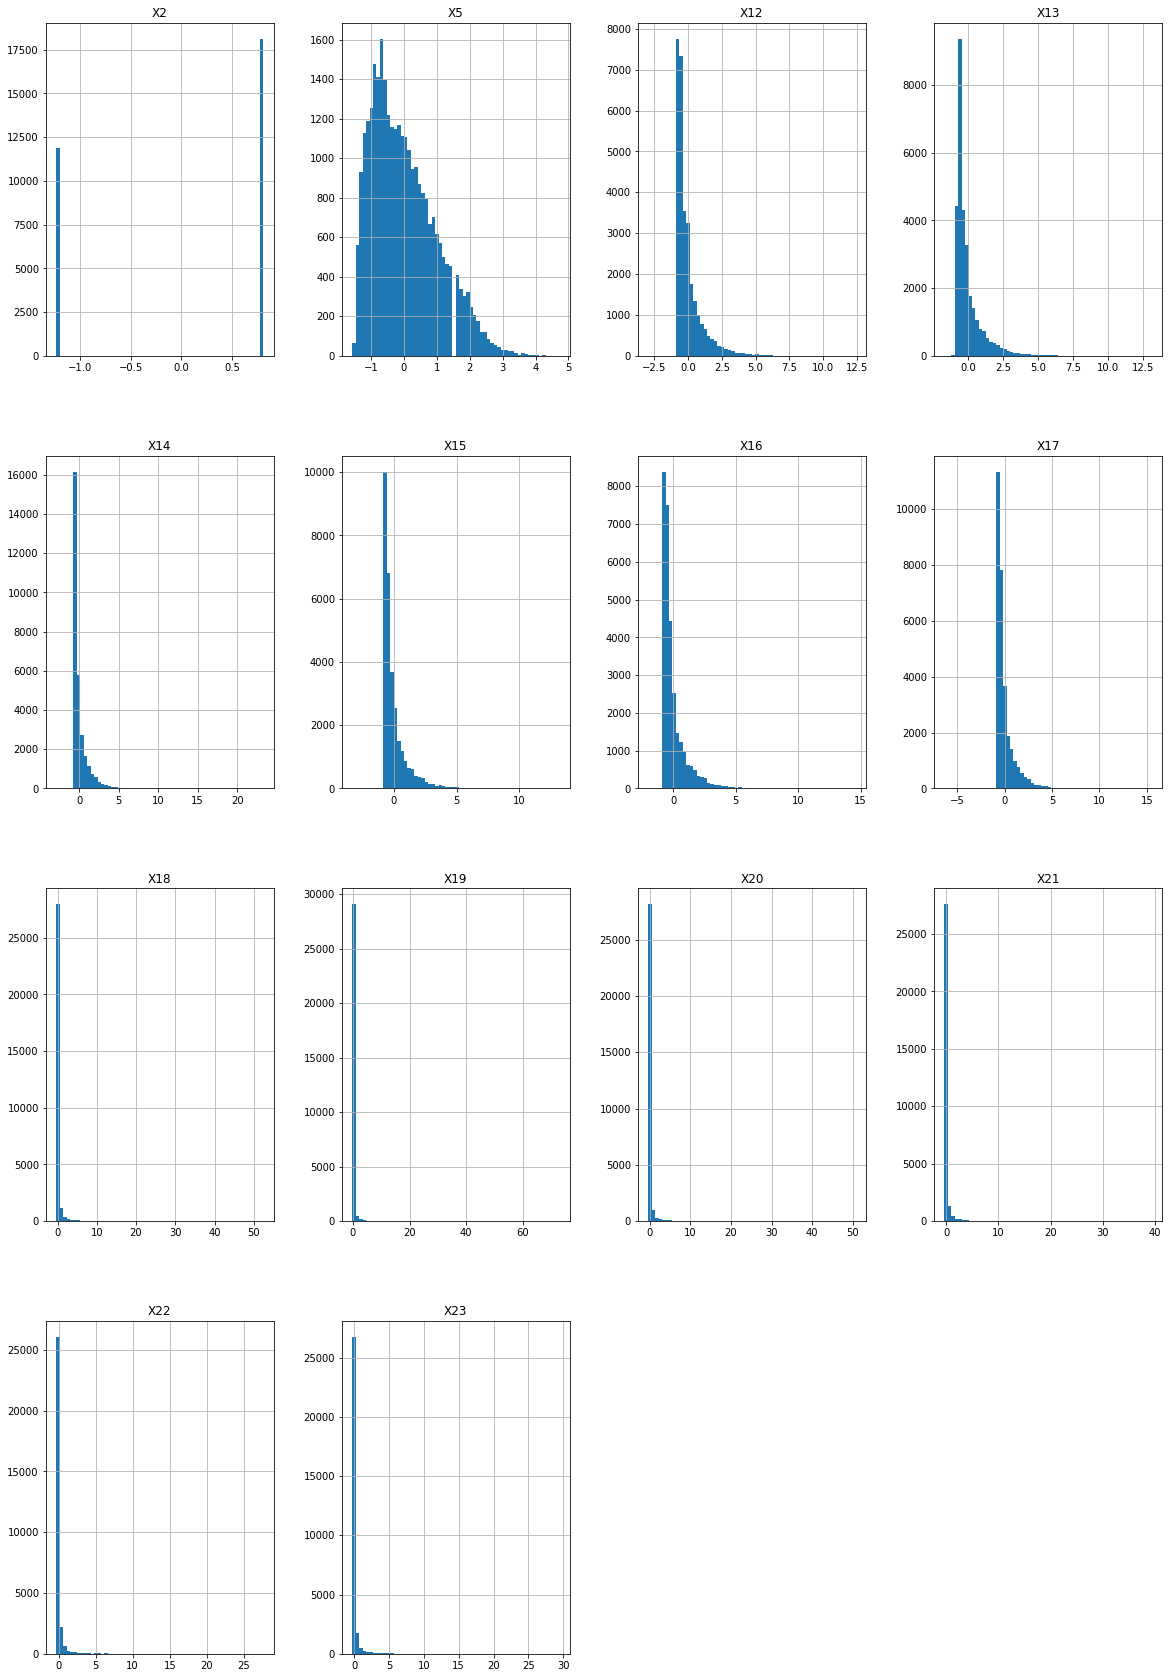

In [275]:
scaled_df_imp.hist(bins = 60, figsize=(20,30))

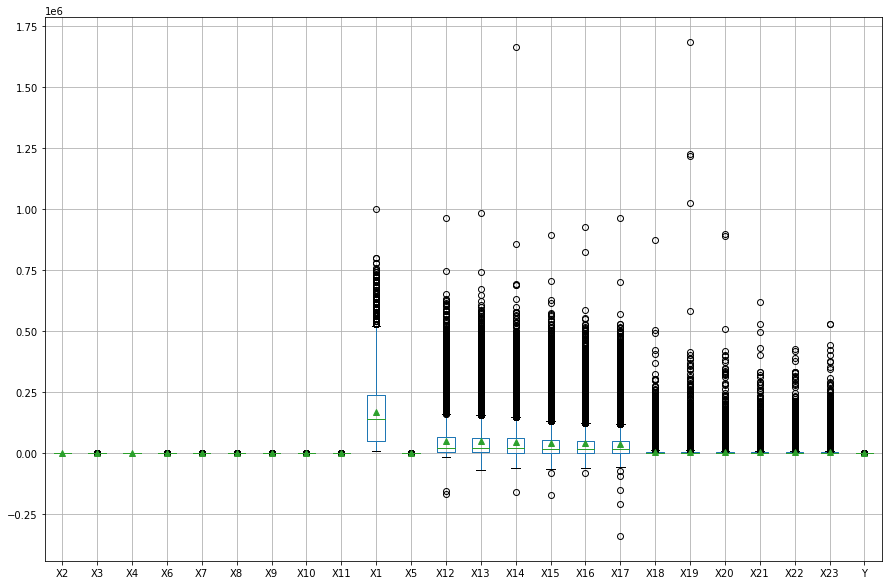

In [276]:
val_atp = dataframe_imp.boxplot(figsize = (15,10),showmeans = True)
val_atp.plot()
plt.show()

9.Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

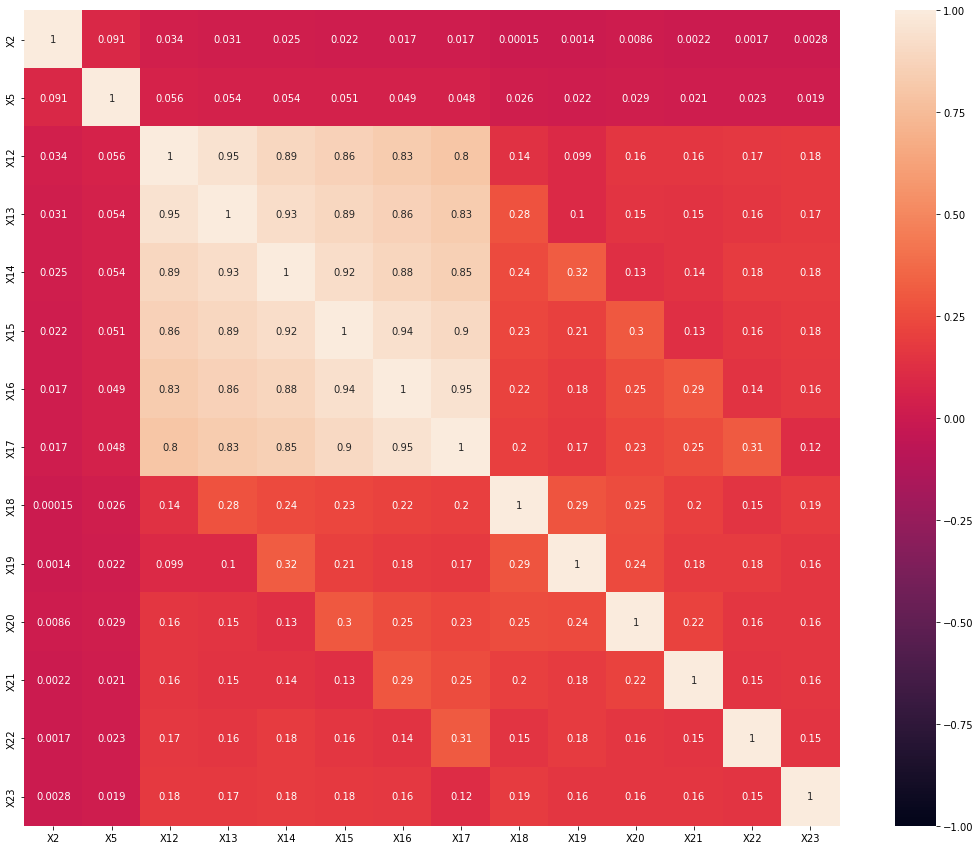

In [279]:
corrmat = scaled_df_imp.corr().abs()

f, ax = plt.subplots(figsize = (20,15)) #Definir el área de trabajo.
sns.heatmap(corrmat, vmax = 1, vmin = -1, square = True, annot = True)

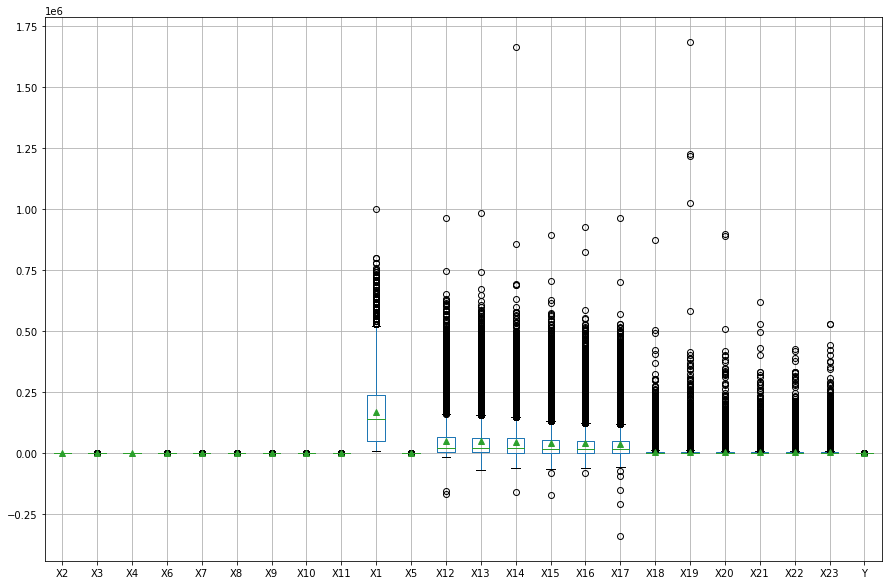

In [280]:
val_atp = dataframe_imp.boxplot(figsize = (15,10),showmeans = True)
val_atp.plot()
plt.show()

10.Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones

Punto 4. Histogramas de cada una de las variables en las cuales podemos apreciar los distintos valores con los que cuenta cada uno de las diferentes variables.

Punto 7. Mapa de calor en el cual podemos apreciar como los puntos más importantes se encuentran en una determinada zona del mapa.

Punto 8. Histogramas de las diferentes variables que podemos encontrar en la lista de categóricas

Punto 8. Bot-Plox en el cual podemos apreciar como las variables que se encuentran dentro de las categóricas presentan diferentes variables.

Analizados cada uno de los graficos, podemos darnos cuenta que las variables las cuales pueden ayudarnos compartiendonos información importante, son aquellas que podemos encontrar en la lista de las categóricas.
